<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Python: Scripting
Caderno de **Exercícios**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Instalando o Python na própria máquina;</li>
  <li>Executando código Python no terminal;</li>
  <li>Criando arquivos de script Python.</li>
</ol>

---

# **Exercícios**

## 0\. Preparando o ambiente

 - Instalando o Python e o PIP na sua máquina.

Nestes exercícios você vai precisar do Python (versão 3.x) e do PIP instalados na sua máquina. Abra o seu terminal (windows `cmd` ou linux/mcos `terminal`) e 
verifique se ambos estão instalados na sua máquina.

```shell
python -V # possível resultado: Python 3.8.5
pip -V # possível resultado: pip 20.0.2 ...
```

Se pelo menos um dos softwares não estiver instalados na sua máquina, siga as instruções da aula para instala-los. Se você tiver enfrentando algum problema, entre em contato com o tutor.

 - Instalando os pacotes necessários.

Instale os pacotes necessários para conduzir os exercícios.

```shell
pip install pandas==1.2.4 seaborn==0.11.1 requests==2.25.1
```

---

## 1\. Script de Extração

O *script* para extrair a taxa CDI do site da B3 foi adaptado para ser executado 10 vezes para gerar nossa base de dados. Na sua máquina, crie o arquivo `extracao.py` com o `script` abaixo e execute-o com o comando:

```shell
python extracao.py
```

No final, você deve ter o arquivo `taxa-cdi.csv` com os dados extraídos.

In [1]:
import os
import time
import json
from random import random
from datetime import datetime

import requests

URL = 'https://www2.cetip.com.br/ConsultarTaxaDi/ConsultarTaxaDICetip.aspx'

# Criando a variável data e hora 

for _ in range(0, 10):

  data_e_hora = datetime.now()
  data = datetime.strftime(data_e_hora, '%Y/%m/%d')
  hora = datetime.strftime(data_e_hora, '%H:%M:%S')

  # Captando a taxa CDI do site da B3

  try:
    response = requests.get(URL)
    response.raise_for_status()
  except requests.HTTPError as exc:
    print("Dado não encontrado, continuando.")
    cdi = None
  except Exception as exc:
    print("Erro, parando a execução.")
    raise exc
  else:
    dado = json.loads(response.text)
    cdi = float(dado['taxa'].replace(',', '.')) + (random() - 0.5)

  # Verificando se o arquivo "taxa-cdi.csv" existe

  if os.path.exists('./taxa-cdi.csv') == False:

    with open(file='./taxa-cdi.csv', mode='w', encoding='utf8') as fp:
      fp.write('data,hora,taxa\n')

  # Salvando dados no arquivo "taxa-cdi.csv"

  with open(file='./taxa-cdi.csv', mode='a', encoding='utf8') as fp:
    fp.write(f'{data},{hora},{cdi}\n')

  time.sleep(2 + (random() - 0.5))

print("Sucesso")

Sucesso


---

## 2\. Script de Visualização

Já o *script* para gerar um grafico da taxa CDI do site da B3 foi adaptado para utilizar o pacote Pandas. Na sua máquina, crie o arquivo `visualizacao.py` com o `script` abaixo e execute-o com o comando:

```shell
python visualizacao.py <nome-do-grafico>
```

O *script* espera um parametro de entrada com o nome do gráfico, portanto substitua o `<nome-do-grafico>` pelo nome do seu gráfico. No final, você deve ter uma imagem no formato png com o nome passado via parametro contendo a visualização dos dados gerados pelo *script* de extração..

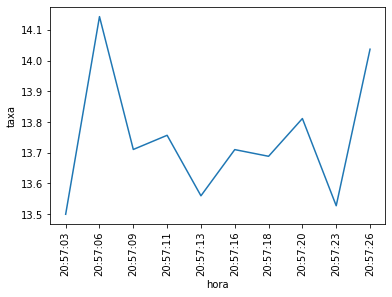

In [2]:
import csv
from sys import argv

import pandas as pd
import seaborn as sns

# Extraindo as colunas hora e taxa

df = pd.read_csv('./taxa-cdi.csv')

# Salvando no grafico

grafico = sns.lineplot(x=df['hora'], y=df['taxa'])
_ = grafico.set_xticklabels(labels=df['hora'], rotation=90)
grafico.get_figure().savefig(f"{argv[1]}.png")


---

## 3\. Combinando os scripts de extração e visualização.

Combine os *scripts* `visualizacao.py` e `extracao.py` no arquivo `analise.py` e execute-o na sua máquina, ele deve retornar os mesmos resultados: o arquivo csv e a imagem no formato png com o título escolhido via parametro de entrada. Procure seguir a organização proposta na aula (PEP8).

```shell
python analise.py <nome-do-grafico>
```

Além disso, copie o código na célula abaixo para que o tutor possa avaliar seu exercícios.

Sucesso


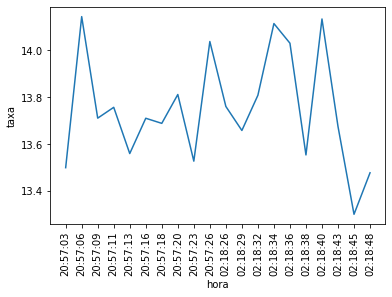

In [3]:
# combinação dos scripts de extração e visualização
import os
import time
import json
from random import random
from datetime import datetime
import csv
from sys import argv

import requests
import pandas as pd
import seaborn as sns

URL = 'https://www2.cetip.com.br/ConsultarTaxaDi/ConsultarTaxaDICetip.aspx'


# Criando a variável data e hora 
for _ in range(0, 10):
  data_e_hora = datetime.now()
  data = datetime.strftime(data_e_hora, '%Y/%m/%d')
  hora = datetime.strftime(data_e_hora, '%H:%M:%S')


  # Captando a taxa CDI do site da B3
  try:
    response = requests.get(URL)
    response.raise_for_status()
  except requests.HTTPError as exc:
    print("Dado não encontrado, continuando.")
    cdi = None
  except Exception as exc:
    print("Erro, parando a execução.")
    raise exc
  else:
    dado = json.loads(response.text)
    cdi = float(dado['taxa'].replace(',', '.')) + (random() - 0.5)


  # Verificando se o arquivo "taxa-cdi.csv" existe
  if os.path.exists('./taxa-cdi.csv') == False:
    with open(file='./taxa-cdi.csv', mode='w', encoding='utf8') as fp:
      fp.write('data,hora,taxa\n')


  # Salvando dados no arquivo "taxa-cdi.csv"
  with open(file='./taxa-cdi.csv', mode='a', encoding='utf8') as fp:
    fp.write(f'{data},{hora},{cdi}\n')
  time.sleep(2 + (random() - 0.5))


print("Sucesso")


# Extraindo as colunas hora e taxa
df = pd.read_csv('./taxa-cdi.csv')


# Salvando no grafico
grafico = sns.lineplot(x=df['hora'], y=df['taxa'])
_ = grafico.set_xticklabels(labels=df['hora'], rotation=90)
grafico.get_figure().savefig(f"{argv[1]}.png")

---